<H6 align="center">Белорусский государственный университет </H6>
<H6 align="center">Механико-математический факультет </H6>
<H6 align="center">Кафедра дифференциальных уравнений  и системного анализа </H6>

<H2 align="center">  Математические основы защиты информации</H2>


<H2 align="center"> Лекция 15.  Решетки</H2>

$ $

<H4 align="center">Чергинец Дмитрий Николаевич </H4>


## 1. Решетки
Пусть $\;v_1,v_2,\dots,v_m\in\mathbb{R}^n\;$  линейно  независимые векторы.

       
Множество векторов
$$
  L=L(v_1,\dots,v_m) :=  \{z_1v_1+z_2v_2+\dots+z_{ m}v_{m} \mid z_1,z_2,\dots,z_{m}\in\mathbb{Z}\},
 $$
называется <font color='blue'> решеткой</font> размерности $\;m.$ 

      
$v_1,      v_2,\dots,v_m\;$ называются <font color='blue'>базисом решетки</font>.
      

      
Решетку можно еще определить как минимальную аддитивную группу в $\;\mathbb{R}^n,\;$ содержащую  векторы $\;v_1,v_2,\dots,v_m\in\mathbb{R}^n.\;$

### <font color='red'>Задание 1.</font>
Изобразить решетку $\;L(v_1, v_2)\;$ в окрестности начала координат. Элементы решетки изображать точками.

In [1]:
v1 = [4, 4]
v2 = [1, 3]

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math

%matplotlib inline

In [3]:
x = list()
y = list()

for i in range(-3, 4):
    for j in range(-3, 4):
        x.append(i*v1[0] + j*v2[0])
        y.append(i*v1[1] + j*v2[1])

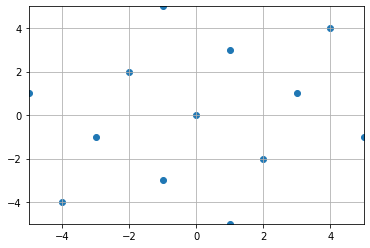

In [4]:
plt.scatter(x, y);
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid(True);

## 2. Теорема о базисе решетки
Пусть $\;V:=(v_1,v_2,\dots,v_m)\;$ &ndash; матрица, столбцами которой являются линейно независимые векторы $\;v_1,v_2,\dots,v_m.\;$
              
Векторы $\;u_1,u_2,\dots,u_m\in\mathbb{R}^n\;$ являются базисом решетки $\;L(v_1,\dots,v_m)\;$ тогда и только тогда, когда
существует такая матрица $\;M\;$ размерности $\;m\times m\;$ с целыми  элементами, что $\;\det M=\pm1,\;$
$$
  U^T=MV^T,
$$
где $\;U:=(u_1,u_2,\dots,u_m)\;$ &ndash; матрица, столбцами которой являются вектора $\;u_i.\;$

### Определитель решетки
<font color='blue'>Определителем решетки</font> $\;L(v_1,v_2,\dots,v_m)\;$ называется число
$$
  d(L):=\sqrt{\det\left(
        \begin{array}{ccc}
         <v_1,v_1> &  \ldots & <v_1,v_m> \\
         <v_2,v_1> &  \ldots & <v_2,v_m> \\
         \vdots    &  \ddots & \vdots    \\ 
         <v_m,v_1> &  \ldots & <v_m,v_m>  
        \end{array}
     \right)}
$$     
Если $\;V:=(v_1,v_2,\dots,v_m)\;$ &ndash; матрица, в $\;i$-ом столбце которой записан вектор $\;v_i,\;$ то     
$$
  d(L)=\sqrt{\det(V^TV)}.
$$ 

### Инвариант решетки
**Теорема.**  
Определитель решетки не зависит от выбора базиса, то есть является инвариантом решетки.

### Задача о кратчайшем векторе
<font color='blue'>Задачей о кратчайшем векторе решетки</font>         называется задача       нахождения ненулевого вектора решетки, который имеет
      наименьшую норму среди всех ненулевых векторов решетки.


Задача о нахождении кратчайшего вектора не принадлежит классу $\;NP.\;$

Задача о нахождении кратчайшего вектора является $\;NP$-трудной.

### <font color='red'>Задание 2.</font>
Найти какой-нибудь другой базис решетки $\;L(v_1, v_2).\;$ Вычислить определитель решетки. Найти кратчайший ненулевой вектор
решетки.

Построим матрицы $V$ и $V^{T}$.

In [5]:
v_tr = np.array([v1, v2])
v = v_tr.transpose()

Матрицу $M$ подберём таким образом, чтобы $det(M) = \pm1$, и вычислим матрицу $U$.

In [6]:
M = np.array([[1, 2], [1, 1]])
u_tr = np.matmul(M, v_tr)
u = u_tr.transpose()
print(u)

[[ 6  5]
 [10  7]]


Получили новый базис решётки: $u_{1} = (6, 10), \: u_{2} = (5, 7)$.

Вычислим определитель решётки.

In [7]:
round(math.sqrt(np.linalg.det(np.matmul(v_tr, v))))

8

Найдём кратчайший ненулевой вектор решётки.

In [8]:
v_min = [2, -2]

## 3. Ортогонализация Грама-Шмидта
**Input:** Базис $\;v_1,v_2,\dots,v_m\in\mathbb{R}^n\;$ векторного пространства.

**Output:** Ортогональный базис $\;w_1,w_2,\dots,w_m\;$ данного  векторного пространства.

$1.$ Для $\;i=1,\dots,m\;$ последовательно вычисляем
 $$
 w_i:=v_i-\sum\limits_{j=1}^{i-1}\mu_{i,j}w_j,
 $$
 где 
 $$ 
 \mu_{i,j}:=\frac{<v_i,w_j>}{<w_j,w_j>}.
 $$


$2.$ Выдаем ответ $\;w_1,w_2,\dots,w_m.$

 

### Связь базисов
Векторы $\;v_i\;$ однозначно определяются через векторы $\;w_i\;$
$$
  v_i=w_i+\sum\limits_{j=1}^{i-1}\mu_{i,j}w_j.
$$   
Доопределим коэффициенты $\mu_{i,j}:$
  
  $  \mu_{i,j}:=0,$
   при $1\leq i<j\leq m,$ 
   
   $\mu_{i,i}:=1.$ 
   
Получили матрицу перехода $\;\mu,\;$ состоящую из $\;\mu_{i,j},$ 
$$
  V^T=\mu W^T.
$$
где  $\;W:=(w_1,w_2,\dots,w_m).\;$ Причем $\det\mu=1.\;$   Но $\;\mu\;$ как правило не целочисленная матрица.

### Ортогональный базис и $\;d(L)$
$$
  d(L)=\sqrt{\det(V^TV)}=  \sqrt{\det(\mu W^TW\mu^T)}  =\sqrt{\det(W^TW)}= \|w_1\| \|w_2\|\dots\|w_m\|.
$$

**Теорема.**  
Для определителя решетки $\;L(v_1,v_2,\dots,v_m)\;$ справедлива формула
$$
  \|w_1\| \|w_2\|\dots\|w_m\|=d(L),
$$
где векторы $\;w_i\;$ получены из векторов $\;v_i\;$ в результате ортогонализации Грама-Шмидта.       

### <font color='red'>Задание 3.</font>
Реализовать ортогонализацию Грама-Шмидта.

## 3. Ортогонализация Грама-Шмидта
**Input:** Базис $\;v_1,v_2,\dots,v_m\in\mathbb{R}^n\;$ векторного пространства.

**Output:** Ортогональный базис $\;w_1,w_2,\dots,w_m\;$ данного  векторного пространства.

$1.$ Для $\;i=1,\dots,m\;$ последовательно вычисляем
 $$
 w_i:=v_i-\sum\limits_{j=1}^{i-1}\mu_{i,j}w_j,
 $$
 где 
 $$ 
 \mu_{i,j}:=\frac{<v_i,w_j>}{<w_j,w_j>}.
 $$


$2.$ Выдаем ответ $\;w_1,w_2,\dots,w_m.$

 

In [9]:
def orthogonalization(v: np.array) -> np.array:
    w = np.array([v[0]])
    for i in range(1, v[0].size):
        total = np.zeros_like(v[0])
        for j in range(i):
            m = np.dot(v[i], w[j]) / np.dot(w[j], w[j])  # текущее m[i][j]
            total = total + np.dot(m, w[j])
        w = np.append(w, v[i] - total)
        
    return w.reshape(v.shape)

In [10]:
w = orthogonalization(v_tr)
print(w)

[[ 4.  4.]
 [-1.  1.]]


### <font color='red'>Задание 4*.</font>
Найти такую решетку $\;L(v_1,\dots,v_m),\;$ базис которой является ортогональным: 
$\;<v_i,v_j>=0\;$ при $\;i\neq j,\;$ и при этом у решетки существует ненулевой вектор $\;v\in L,\;$ меньший базисных векторов:
$$
    \forall i:=1,\dots,m\qquad (\|v_i\|>\|v\|).
$$
Первому решившему +1 балл на экзамене.

## 4. $LLL$-приведенный базис
Базис $\;v_1,v_2,\dots,v_m\;$ решетки называется  <font color='blue'>$\;LLL$-приведенным</font>, если он удовлетворяет следующим двум  условиям.

$1.\;$ Для всех $\;i,j\;$ таких, что $\;1\leq j<i \leq m,\;$ справедливо       неравенство $\;|\mu_{i,j}|\leq\frac12.\;$


$2.\;$ Для $\;k=2,\dots,m\;$ справедливо неравенство
$$
  \left(\frac34-\mu^2_{k,k-1}\right) \|w_{k-1}\|^2\leq\|w_k\|^2.
$$


Здесь $\;\mu_{i,j}=\frac{<v_i,w_j>}{<w_j,w_j>},\;$ базис $\;w_1,w_2,\dots,w_m\;$ получен из       базиса $\;v_1,v_2,\dots,v_m\;$ путем ортогонализации Грама-Шмидта.


## 5.  LLL-алгоритм
**Схема LLL-алгоритма.**  

**Input:** Базис $\;v_1,v_2,\dots,v_m\in\mathbb{R}^n\;$ решетки $\;L$.

**Output:** LLL-приведенный базис решетки $\;L.$

$1.\;$ $\;k:=2.$

$2.\;$ $\;v_k:=v_k-\sum\limits_{j=1}^{k-1}round(\mu_{k,j})v_{j}.$

$3.\;$ Если $\;\left(\frac34-\mu_{k,k-1}^2\right)\|w_{k-1}\|^2\leq\|w_k\|^2,$ 
     
$\qquad$ то $\;k:=k+1,$ 
     
$\qquad$ иначе     векторы $\;v_k\;$ и $\;v_{k-1}\;$ меняем местами,  $\;k:=\max\{2,k-1\}.$

$4.\;$ Если $\;k\leq m,\;$ то переходим к шагу 2.

$5.\;$ Результат $\;v_1,v_2,\dots,v_m.$


### LLL-алгоритм
   
**Input:** $v_1,v_2,\dots,v_m\in\mathbb{R}^n$ &ndash; базис решетки.

**Output:** LLL-приведенный базис решетки.

$1.\;$ Ортогонализация Грама-Шмидта.  
$\quad$ Для $\;i=1,2,\dots,m\;$ выполнить шаги 1.1-1.3:
   
$\qquad 1.1.\;$ Присвоить $\;w_i:=v_i.$
   
$\qquad1.2.\;$ Для $\;j=1,2,\dots,i-1\;$ вычислить 
$$
  \mu_{i,j}:=\frac{<v_i,w_j>}{W_j},\qquad w_i:=w_i-\mu_{i,j}w_j.
$$
$\qquad1.3.\;$ Положить $\;\mu_{i,i}:=1,\;$ $\;W_i:=<w_i,w_i>.\;$

$2.\;$ Инициализируем переменную
   $\;k=2.$

$3.\;$  Если $\;|\mu_{k,k-1}|>\frac12,\;$ то выполнить шаги 3.1-3.3.
   
$\qquad 3.1.\;$ Присвоить $\;r:=Round(\mu_{k,k-1}).$ 
   
$\qquad 3.2.\;$ Вычислить $\;v_k:=v_k-r v_{k-1}.$
   
$\qquad 3.3.\;$ Для $\;j=1,2,\dots,k-1\;$  положить $\;\mu_{k,j}:=\mu_{k,j}-r\mu_{k-1,j}.$   
 

$4.\;$ Если $\;\left(\frac34-\mu_{k,k-1}^2\right)W_{k-1}>W_{k},\;$ то вып. 4.1-4.5.


$\qquad4.1.\;$ Поменять местами вектор $\;v_k\;$ с $\;v_{k-1}.\;$
   
$\qquad4.2.\;$ Присвоить $\;\mu:=\mu_{k,k-1},\;$ $\;W:=W_k+\mu^2W_{k-1},$ 
   $$
     \mu_{k,k-1}:=\frac{\mu W_{k-1}}W,\quad W_{k}:=\frac{W_{k-1}W_k}{W},\quad W_{k-1}:=W.
   $$  
   
$\qquad4.3.\;$ Для $\;j=1,2,\dots,k-2\;$ поменять местами $\;\mu_{k,j}\;$ с $\;\mu_{k-1,j}.\;$ 
   
$\quad4.4.\;$ Для $\;s=k+1,k+2,\dots,m\;$ положить  
$$
  t:=\mu_{s,k},\qquad\mu_{s,k}:=\mu_{s,k-1}-\mu t,\qquad
  \mu_{s,k-1}:=t+\mu_{k,k-1}\mu_{s,k}.
 $$
   
$\quad4.5.\;$ $\;k:=\max\{2,k-1\}\;$ и перейти к шагу 3.   

  
$5.\;$ Если $\;\left(\frac34-\mu_{k,k-1}^2\right)W_{k-1}\leq W_{k},\;$ то для $\;l=k-2,k-3,\dots,1\;$ при условии, что $\;\mu_{k,l}>\frac12\;$ выполнить шаги 5.1-5.3.
   
$\qquad5.1.\;$ Присвоить $\;r:=Round(\mu_{k,l}).$
   
$\qquad5.2.\;$ Положить $\;v_k:=v_k-r v_l.$
   
$\qquad5.3.\;$ Для $\;j=1,2,\dots,l\;$ присвоить 
                  $\;\mu_{k,j}:=\mu_{k,j}-r\mu_{l,j}.$
   
   
$6.\;$ Присвоить $\;k:=k+1.$
   
$7.\;$ Если $\;k\leq m,\;$ то перейти к шагу 3.
   
$8.\;$ Выдать результат $\;v_1,v_2,\dots,v_m.$

Литература: Маховенко, Е.Б. Теоретико-числовые методы в криптографии / Е.Б. Маховенко. – М.: Гелиос АРВ, 2006. – 320с.


### <font color='red'>Задание 5*.</font>
реализовать $LLL$-алгоритм. Первому решившему +1 балл на экзамене.